In [105]:
%precision %08.2f

'%08.2f'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import nltk
from textblob import TextBlob
from sklearn.cluster import KMeans
from collections import OrderedDict

In [3]:
with open("analysed/test.txt","r", encoding="utf8", errors='ignore')as f:
    entire_txt = f.read()
    """stm = entire_txt.sprit(".")"""
    stm = entire_txt.splitlines()
    print("Text lines =", len(stm))
    """print("Text lines =", len(stm))"""

Text lines = 64


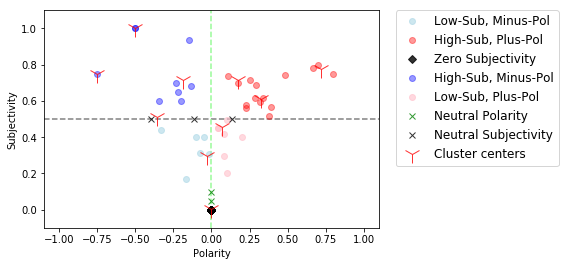

In [4]:
pol_sub = [] 

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1)

p = plt.hlines([0.5], -1.1, 1.1, "grey", linestyles='dashed') 
p = plt.vlines([0.0], -0.1, 1.1, "palegreen", linestyles='dashed')

for i,item in enumerate(stm):
    stm2 = TextBlob(stm[i])
    pol_sub.append([stm2.sentiment.polarity, stm2.sentiment.subjectivity])
    
Neutral_P = 0
Neutral_S = 0
Zero_S = 0
High_S_Minus_P = 0
High_S_Plus_P = 0
Low_S_Minus_P = 0
Low_S_Plus_P = 0


for i,item in enumerate(stm):
    plt.xlabel("Polarity")
    plt.ylabel("Subjectivity")
    if (pol_sub[i][0] == 0.00 and pol_sub[i][1] != 0.00):
        Neutral_P += 1
        plt.plot(pol_sub[i][0], pol_sub[i][1],"x", color="green", alpha = 0.8,label = "Neutral Polarity")
    if (pol_sub[i][1] == 0.50):
        Neutral_S += 1
        plt.plot(pol_sub[i][0], pol_sub[i][1],"x", color="black", alpha = 0.8,label = "Neutral Subjectivity")
    if (pol_sub[i][0] < 0.00 and pol_sub[i][1] > 0.50):
        High_S_Minus_P += 1
        plt.plot(pol_sub[i][0], pol_sub[i][1],"o", color="blue", alpha = 0.4,label = "High-Sub, Minus-Pol")
    if (pol_sub[i][0] > 0.00 and pol_sub[i][1] > 0.50):
        High_S_Plus_P += 1
        plt.plot(pol_sub[i][0], pol_sub[i][1],"o", color="red", alpha = 0.4,label = "High-Sub, Plus-Pol")
    if (pol_sub[i][0] < 0.00 and pol_sub[i][1] < 0.50):
        Low_S_Minus_P += 1
        plt.plot(pol_sub[i][0], pol_sub[i][1],"o", color="lightblue", alpha = 0.6,label = "Low-Sub, Minus-Pol")
    if (pol_sub[i][0] > 0.00 and pol_sub[i][1] < 0.50):
        Low_S_Plus_P += 1
        plt.plot(pol_sub[i][0], pol_sub[i][1],"o", color="pink", alpha = 0.6,label = "Low-Sub, Plus-Pol")
    if (pol_sub[i][1] == 0.00):
        Zero_S += 1
        plt.plot(pol_sub[i][0], pol_sub[i][1],"D", color="black", alpha = 0.8,label = "Zero Subjectivity")
    
clusters = 10
kmean = KMeans(clusters)
kmean.fit(pol_sub)

for i in range(0, clusters):
    plt.plot(kmean.cluster_centers_[i][0], kmean.cluster_centers_[i][1],"1", c ="red", ms = 18, alpha = 0.8, label = "Cluster centers")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)

[[-1.38777878e-17  6.25000000e-03]
 [ 1.77380952e-01  7.17936508e-01]
 [-7.50000000e-01  7.50000000e-01]
 [-1.86250000e-01  7.14166667e-01]
 [ 7.22222222e-01  7.77777778e-01]
 [ 6.99134199e-02  4.58994709e-01]
 [-5.00000000e-01  1.00000000e+00]
 [ 3.26818182e-01  6.08709583e-01]
 [-3.20100421e-02  2.97119372e-01]
 [-3.58611111e-01  5.13333333e-01]]
Neutral Polarity = 2
Neutral Subjectivity= 3
Zero Subjectivity= 22
High-Sub, Minus-Pol= 9
High-Sub, Plus-Pol= 15
Low-Sub, Minus-Pol= 6
Low-Sub, Plus-Pol= 7


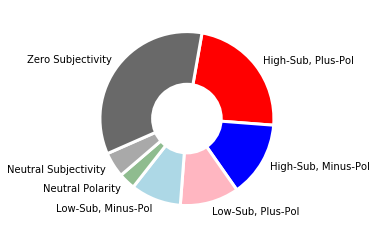

In [8]:
print(kmean.cluster_centers_)
print("Neutral Polarity =", Neutral_P)
print("Neutral Subjectivity=", Neutral_S)
print("Zero Subjectivity=", Zero_S)
print("High-Sub, Minus-Pol=", High_S_Minus_P)
print("High-Sub, Plus-Pol=", High_S_Plus_P)
print("Low-Sub, Minus-Pol=", Low_S_Minus_P)
print("Low-Sub, Plus-Pol=", Low_S_Plus_P)

x = np.array([High_S_Plus_P, High_S_Minus_P, Low_S_Plus_P, Low_S_Minus_P, Neutral_P, Neutral_S, Zero_S])
label = ["High-Sub, Plus-Pol", "High-Sub, Minus-Pol", "Low-Sub, Plus-Pol", "Low-Sub, Minus-Pol", "Neutral Polarity", "Neutral Subjectivity","Zero Subjectivity"]
colors = ["red", "blue", "lightpink", "lightblue", "darkseagreen","darkgrey","dimgrey"]
plt.pie(x, labels=label, counterclock=False, startangle=80, colors=colors, wedgeprops={'linewidth': 3, 'edgecolor':"white"})

centre_circle = plt.Circle((0,0),0.4,color='white', fc='white',linewidth=2.0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)